In [1]:
import numpy as np
import matplotlib.pyplot as plt

Akcije koje igraci imaju su DEFECT i COOPERATE

In [2]:
COOPERATE = 0
DEFECT = 1

Ukoliko oba igraca izaberu COOPERATE, odnosno zele da podele poene dobice po 3p. Ukoliko oba zele da uzmu poene sebi dobice po poen, dok ukoliko jedan odluci da podeli, a drugi da uzme, igrac koji deli ne dobija nista, dok ovaj sto je uzeo dobija 5p.

In [3]:

ishod = {
    (COOPERATE, COOPERATE): (3, 3),  
    (COOPERATE, DEFECT): (0, 5),     
    (DEFECT, COOPERATE): (5, 0),    
    (DEFECT, DEFECT): (1, 1)         
}

Simulira se x partija. Na duze staze 150+ partija, igrac 2 koji uvek igra na saradnju dok igrac 1 ne odigra sebicno, nakon cega bi igrac 2 igrao suprotno od poslednje odluke igraca 1, dobija vecu dobit na kraju u teoriji.
Igrac 2 u teoriji uvek dobija na duze staze ukoliko da sansu igracu 1 igrajuci na saradju pri pocetku simulacije, dok onda sistemski igra suportno od igraca 1 svaki potez ili ucestalo.

In [4]:
rounds = 150
odluke_1 = []
odluke_2 = []
zbir_1 = []
zbir_2 = []

In [5]:
#np.random.seed(42)  # zadrzava iste random brojeve i sledeci put kad se pokrene - --debug
igrac2_sebican = False #ovde pamti da je igrac 1 u porsloj rundi izdao
prethodno_i1 = COOPERATE #igrac 2 uvek igra prvo cooperate

for _ in range(rounds):
    odluka_1 = np.random.choice([COOPERATE, DEFECT]) #glupi igrac 1 bira random
    odluke_1.append(odluka_1)
    
    if  not igrac2_sebican:  
        odluka_2 = COOPERATE  #igra saradnju ako je igrac 1 proslu igrao na saradju
        if odluka_1 == DEFECT: 
            igrac2_sebican = True  #igrac2 se ljuti sto je prvi igrao defect i prestaje da bude dobar po defaultu
            prethodno_i1 = odluka_1 #pamti sta je igrao i1
        #else:
            # = False
    else:
        #odluka_2 = DEFECT if prethodni_i1 == DEFECT else COOPERATE #igraj cooperate ako je igrac1 proslu defect
         odluka_2 = prethodno_i1 
         
    odluke_2.append(odluka_2)
    dobit_runde_1, dobit_runde_2 = ishod[(odluka_1, odluka_2)]
    zbir_1.append(dobit_runde_1)
    zbir_2.append(dobit_runde_2)


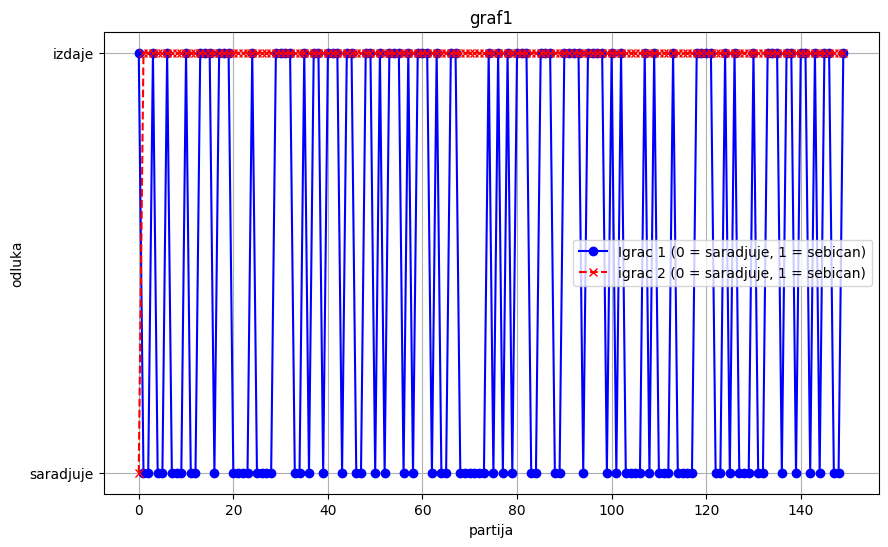

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [6]:

plt.figure(figsize=(10, 6))


plt.plot(odluke_1, label="Igrac 1 (0 = saradjuje, 1 = sebican)", color='blue', marker='o', linestyle='-')
plt.plot(odluke_2, label="igrac 2 (0 = saradjuje, 1 = sebican)", color='red', marker='x', linestyle='--')
plt.title("graf1")
plt.xlabel("partija")
plt.ylabel("odluka")
plt.yticks([COOPERATE, DEFECT], ["saradjuje", "izdaje"])
plt.legend()

plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))

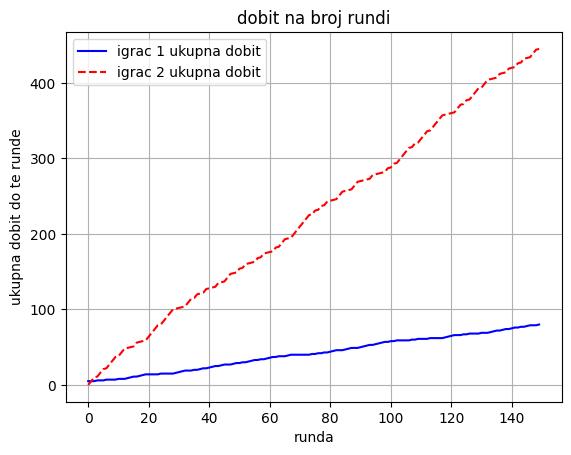

igrac 1 dobiti:  [ 5  5  5  6  6  6  7  7  7  7  8  8  8  9 10 11 11 12 13 14 14 14 14 14
 15 15 15 15 15 16 17 18 19 19 19 20 20 21 22 22 23 24 25 25 26 27 27 27
 28 29 29 30 30 31 32 33 33 34 34 35 36 37 37 38 38 38 39 40 40 40 40 40
 40 40 41 41 42 42 43 43 44 45 46 46 46 47 48 49 49 49 50 51 52 53 53 54
 55 56 57 57 58 58 59 59 59 59 59 60 60 61 61 61 61 62 62 62 62 62 63 64
 65 66 66 66 67 67 68 68 68 68 69 69 69 70 71 72 72 73 74 74 75 76 76 77
 77 78 79 79 79 80] 

  igrac 2 dobiti:  [  0   5  10  11  16  21  22  27  32  37  38  43  48  49  50  51  56  57
  58  59  64  69  74  79  80  85  90  95 100 101 102 103 104 109 114 115
 120 121 122 127 128 129 130 135 136 137 142 147 148 149 154 155 160 161
 162 163 168 169 174 175 176 177 182 183 188 193 194 195 200 205 210 215
 220 225 226 231 232 237 238 243 244 245 246 251 256 257 258 259 264 269
 270 271 272 273 278 279 280 281 282 287 288 293 294 299 304 309 314 315
 320 321 326 331 336 337 342 347 352 357 358 359 360 361 366 371 3

In [7]:

skupljenadobit1 = np.cumsum(zbir_1)
skupljenadobit2 = np.cumsum(zbir_2)

ukupnadobit_p1 = sum(skupljenadobit1)
ukupnadobit_p2 = sum(skupljenadobit2)

plt.plot(skupljenadobit1, label="igrac 1 ukupna dobit", color='blue', linestyle='-')
plt.plot(skupljenadobit2, label="igrac 2 ukupna dobit", color='red', linestyle='--')

plt.title("dobit na broj rundi")
plt.xlabel("runda")
plt.ylabel("ukupna dobit do te runde")
plt.legend()
plt.grid(True)
plt.show()



print("igrac 1 dobiti: ", skupljenadobit1, "\n\n", " igrac 2 dobiti: ", skupljenadobit2)
print("igrac 1 ukupna dobit: ", ukupnadobit_p1, "\n\n", " igrac 2 ukupna dobit: ", ukupnadobit_p2)